In [17]:
import cv2, sys
from matplotlib import pyplot as plt
import numpy as np

In [4]:
test = cv2.imread(r'C:\program1\image_raw\5.bmp')
test_gray = cv2.imread(r'C:\program1\image_raw\5.bmp', cv2.IMREAD_GRAYSCALE)

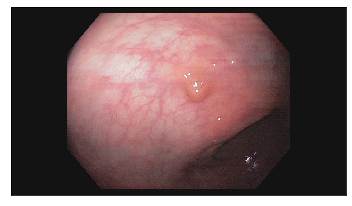

In [5]:
b, g, r = cv2.split(test)

test2 = cv2.merge([r,g,b])

plt.imshow(test2)
plt.xticks([])
plt.yticks([])
plt.show()

In [11]:
cv2.imshow('image', test)
cv2.imshow('image_gray', test_gray)

cv2.waitKey(0)

-1

In [46]:
blur = cv2.GaussianBlur(test_gray, ksize = (5, 5), sigmaX = 0)
ret, thresh1 = cv2.threshold(blur, 127, 255, cv2.THRESH_BINARY)

In [47]:
edged = cv2.Canny(blur, 10, 250)
cv2.imshow('Edged', edged)
cv2.waitKey(0)

-1

In [20]:
kanel1 = cv2.getStructuringElement(cv2.MORPH_RECT, (7 , 7))
closed = cv2.morphologyEx(edged, cv2.MORPH_CLOSE, kernel)
cv2.imshow('closed', closed)
cv2.waitKey(0)

NameError: name 'kernel' is not defined

In [50]:
contours, _ = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
total = 0

In [51]:
contours_image = cv2.drawContours(test, contours, -1, (0, 255, 0), 3)
cv2.imshow('contours_image', contours_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [52]:
contours_xy = np.array(contours)
contours_xy.shape

(1, 940, 1, 2)

In [57]:
x_min, x_min = 0, 0
value = list()
for i in range(len(contours_xy)):
    for j in range(len(contours_xy[i])):
        value.append(contours_xy[i][j][0][0])
        x_min = min(value)
        x_max = max(value)

print(x_min)
print(x_max)


y_min, y_min = 0, 0
value = list()
for i in range(len(contours_xy)):
    for j in range(len(contours_xy[i])):
        value.append(contours_xy[i][j][0][1])
        y_min = min(value)
        y_max = max(value)

print(y_min)
print(y_max)
               
               

319
1600
37
1046


In [59]:
x = x_min
y = y_min
w = x_max - x_min
h = y_max - y_min

img_trim = test[y:y+h, x:x+w]
cv2.imwrite('org_trim.png', img_trim)
org_img = cv2.imread('org_trim.png')

In [60]:
cv2.imshow('org_img', org_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [64]:
import glob
import time
import cv2
from matplotlib import pyplot as plt
import numpy as np
import os

#원하는 경로 지정 변수
path_image = 'C:\program1\image_raw'

tif = glob.glob(path_image + '/*.tif')
png = glob.glob(path_image + '/*.png')
bmp = glob.glob(path_image + '/*.bmp')

SAVE_PATH = r'C:\Users\내꺼\Git_WorkSpace\DN_Python_lab\Project\tumor_img_preprocessing\\'

In [70]:
def load_img(DATA_KIND, SAVE_PATH):
    

    for a in DATA_KIND:
        img_gray = cv2.imread(a, cv2.IMREAD_GRAYSCALE)
        basename = os.path.basename(a)
        
        blur = cv2.GaussianBlur(img_gray, ksize = (5, 5), sigmaX = 0)
        ret, thresh1 = cv2.threshold(blur, 127, 255, cv2.THRESH_BINARY)

        edged = cv2.Canny(blur, 10, 250)


        contours, _ = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        total = 0


        contours_xy = np.array(contours)
        contours_xy.shape
        print(SAVE_PATH + basename)

In [71]:
load_img(bmp, SAVE_PATH)

C:\Users\내꺼\Git_WorkSpace\DN_Python_lab\Project\tumor_img_preprocessing\\5.bmp


In [61]:
        x_min, x_min = 0, 0
        value = list()
        
        for i in range(len(contours_xy)):
            for j in range(len(contours_xy[i])):
                value.append(contours_xy[i][j][0][0])
                x_min = min(value)
                x_max = max(value)


        y_min, y_min = 0, 0
        value = list()
        
        for i in range(len(contours_xy)):
            for j in range(len(contours_xy[i])):
                value.append(contours_xy[i][j][0][1])
                y_min = min(value)
                y_max = max(value)


        x = x_min
        y = y_min
        w = x_max - x_min
        h = y_max - y_min
        
        img_trim = img_gray[y:y+h, x:x+w]
        cv2.imwrite(SAVE_PATH + basename, img_trim)

In [63]:
bmp

['C:\\program1\\image_raw\\5.bmp']